In [71]:
import pandas as pd
import numpy as np
import numpy.ma as ma
from numpy.lib.stride_tricks import sliding_window_view

import matplotlib.pyplot as plt
import japanize_matplotlib

from pathlib import Path

import joblib
import re

from tqdm import tqdm

import exercise_util

In [33]:
_p = Path(f'data/binance/trades/BTCUSDT')    

_list_trades_file = list(_p.glob(f'BTCUSDT-trades-*'))

def count_trade_count(idx, filename):
    _df_newday = pd.read_pickle(filename)
    return (_df_newday['time'][0], len(_df_newday))    

with exercise_util.tqdm_joblib(total = len(_list_trades_file)):
    results = joblib.Parallel(n_jobs = -2, timeout = 60*60*24)([joblib.delayed(count_trade_count)(_idx, _filename) for _idx, _filename in enumerate(_list_trades_file)])

_list_trade_count = []
_list_index = []
for result in results:
    _list_index.append(result[0])
    _list_trade_count.append(result[1])

_df = pd.DataFrame()
_df['日付'] = pd.Series(_list_index)
_df['トレード回数'] = pd.Series(_list_trade_count)

  0%|          | 0/1145 [00:00<?, ?it/s]

In [39]:
_df['秒間トレード回数'] = _df['トレード回数'] / 24 / 60 / 60
#_df[_df['トレード回数'] > _df['トレード回数'].quantile(0.95)].sort_values('日付', ascending = False)
pd.set_option('display.min_row', 50)
_df[_df['トレード回数'] > _df['トレード回数'].quantile(0.0)].sort_values('日付', ascending = False)

,日付,トレード回数,秒間トレード回数
284,2022-10-26 00:00:00.140000000,4594814,53.180718
145,2022-10-25 00:00:00.070000128,4031850,46.664931
391,2022-10-24 00:00:00.012000000,2450024,28.356759
546,2022-10-23 00:00:04.326000128,1947148,22.536435
515,2022-10-22 00:00:00.084000000,1079976,12.499722
846,2022-10-21 00:00:00.079000064,2984842,34.546782
392,2022-10-20 00:00:02.425999872,2877859,33.308553
962,2022-10-19 00:00:00.054000128,2416553,27.969363
977,2022-10-18 00:00:00.032000000,3459125,40.036169
1140,2022-10-17 00:00:00.171000064,2887591,33.421192


In [110]:
df = pd.read_pickle('data/binance/trades/BTCUSDT/BTCUSDT-trades-2021-05-19.pkl.gz')
display(df)

,id,price,qty,quote_qty,time,is_buyer_maker
0,818906740,42882.54,0.012,514.59,2021-05-19 00:00:00.115000064,False
1,818906741,42882.53,0.003,128.64,2021-05-19 00:00:00.127000064,True
2,818906742,42882.53,0.002,85.76,2021-05-19 00:00:00.127000064,True
3,818906743,42879.58,0.004,171.51,2021-05-19 00:00:00.127000064,True
4,818906744,42879.26,0.001,42.87,2021-05-19 00:00:00.127000064,True
5,818906745,42876.41,0.082,3515.86,2021-05-19 00:00:00.127000064,True
6,818906746,42876.40,0.001,42.87,2021-05-19 00:00:00.127000064,True
7,818906747,42876.22,0.017,728.89,2021-05-19 00:00:00.127000064,True
8,818906748,42875.03,0.012,514.50,2021-05-19 00:00:00.127000064,True
9,818906749,42877.22,0.001,42.87,2021-05-19 00:00:02.112999936,True


,id,price,qty,quote_qty,time,is_buyer_maker,marker_size
7081,818913821,43041.54,0.035,1506.45,2021-05-19 00:00:50.019000064,False,0.000154
7082,818913822,43037.73,0.021,903.79,2021-05-19 00:00:50.039000064,True,0.000092
7083,818913823,43036.93,0.002,86.07,2021-05-19 00:00:50.039000064,True,0.000009
7084,818913824,43036.93,0.005,215.18,2021-05-19 00:00:50.039000064,True,0.000022
7085,818913825,43037.74,0.010,430.37,2021-05-19 00:00:50.089999872,True,0.000044
7086,818913826,43036.93,0.037,1592.36,2021-05-19 00:00:50.089999872,True,0.000162
7087,818913827,43036.79,0.006,258.22,2021-05-19 00:00:50.184000000,True,0.000026
7088,818913828,43036.77,0.015,645.55,2021-05-19 00:00:50.184999936,True,0.000066
7089,818913829,43036.77,0.040,1721.47,2021-05-19 00:00:50.184999936,True,0.000176
7090,818913830,43036.64,0.039,1678.42,2021-05-19 00:00:50.184999936,True,0.000171


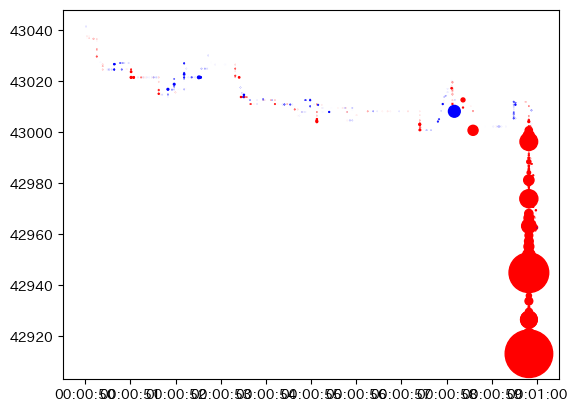

In [130]:
from datetime import datetime

df_render = df[(df['time'] >= datetime.fromisoformat('2021-05-19 00:00:50')) & (df['time'] <= datetime.fromisoformat('2021-05-19 00:01:00'))].copy()
display(df_render)
df_render['marker_size'] = (df_render['quote_qty'] - df_render['quote_qty'].min()) / df_render['quote_qty'].min() / 500
plt.scatter(df_render['time'], df_render['price'], s = df_render['marker_size'] ** 2, c = np.where(df_render['is_buyer_maker'], 'red', 'blue'))